# Tugas 1: Multiple Linear Regression
- Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
- Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
Lakukan feature scaling jika diperlukan.
- Buat model multiple linear regression menggunakan Scikit-Learn.
- Latih model pada data latih dan lakukan prediksi pada data uji.
- Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

- Catatan Tambahan:
Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('insurance.csv')

# data.head()
# data.shape
data.info()
data.isnull().sum()
# data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dataset _insurance.csv_ memiliki 7 kolom dengan 4 kolom numerik (age,bmi,children,charges) dan 3 kolom non numerik (sex,smoker,region) dengan tidak ada data yang null.

In [2]:
# encoder data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

Encoding data non numerik ke numerik.

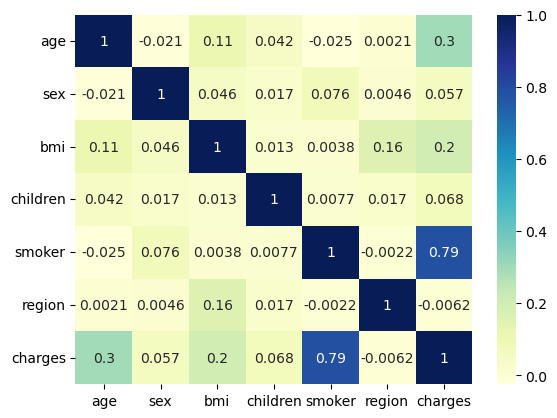

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# menampilkan korelasi antar data menggunakan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()


Berdasarkan korelasi diatas terdapat 3 variabel yang sangat berkorelasi dengaan target(charges) yaitu smoker, age, dan bmi.


<Figure size 640x480 with 0 Axes>

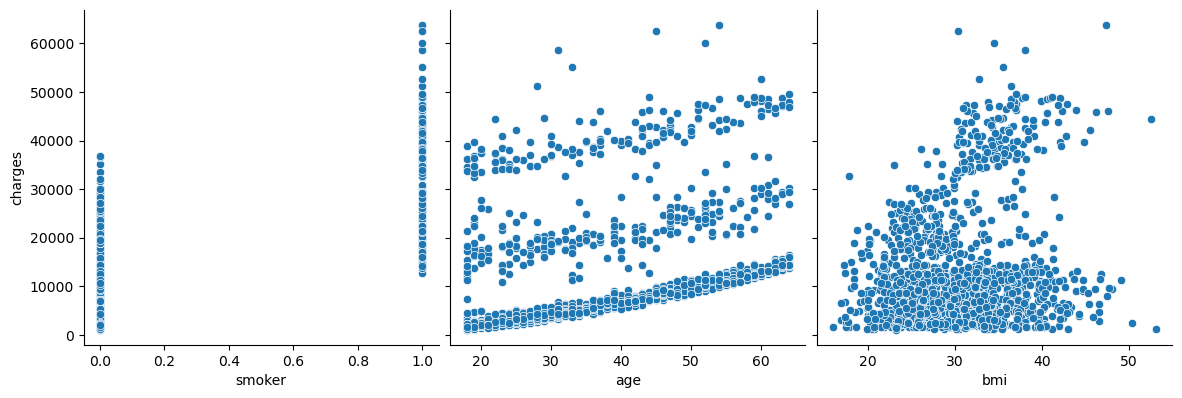

In [4]:
# Menampilkan persebaran fitur terhadap target
fig = plt.figure()
sns.pairplot(data, x_vars=['smoker','age','bmi'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

Dari visualisasi diatas dapat diketahui jika smoker berpengaruh dengan charges yang semakin tinggi, sedangkan age memiliki korelasi linear cukup kuat dengan charges. Sedangkan BMI cukup merata namun sebagian charges lebih tinggi pada bmi 30 - 40.

In [5]:
# Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
from sklearn.model_selection import train_test_split
X = data[['smoker','age', 'bmi']]
Y = data['charges']
# Rasio 8:2 dengan random state 42
x_train, x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,test_size = 0.2,random_state=42)


### Multiple Linear Regression

In [6]:
# model multiple linear regression menggunakan Scikit-Learn
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr.predict(x_test)
print('Interceps : \n', mlr.intercept_)
print('Koefisien : \n', list(zip(x_test,mlr.coef_)))


Interceps : 
 -11707.802334583166
Koefisien : 
 [('smoker', 23675.3718466553), ('age', 259.4102046230584), ('bmi', 326.45023215292485)]


In [7]:
# model multiple linear regression menggunakan stats-model
import statsmodels.api as sm

model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              2379.
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                        0.00
Time:                        10:39:11   Log-Likelihood:                         -10908.
No. Observations:                1070   AIC:                                  2.182e+04
Df Residuals:                    1067   BIC:                                  2.184e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
# Prediksi pada data uji
y_pred = mlr.predict(x_test)
# visualisasikan multiple linear predict
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

,Actual value,Predicted value
764,9095.06825,8184.041468
887,5272.17580,7431.001001
890,29330.98315,37346.437099
1293,9301.89355,8629.528305
259,33750.29180,27316.654810


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 4260.560091099393
MSE: 34512843.88022789
RMSE: 5874.763304187488
R-squared: 0.7776932310583375


Dari hasil diatas dapat diketahui bahwa nilai R-squared 0.77 dimana terdapat hubungan yang kuat antara variable dependent dan independent.

### SVR

In [10]:
# feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)
y_scaled = sc.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = sc.fit_transform(y_test.values.reshape(-1,1))



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


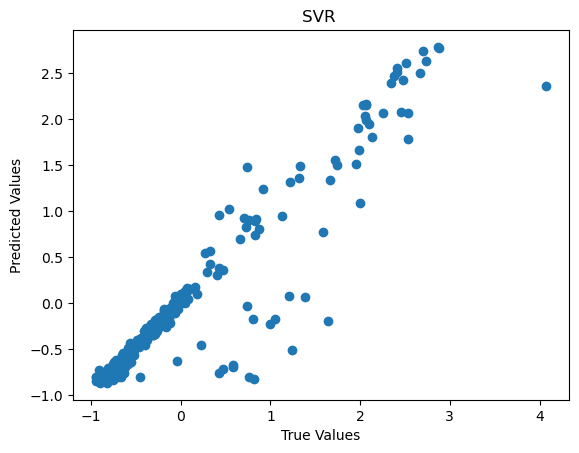

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_test_scaled,y_test_scaled)
y_pred = regressor.predict(x_test_scaled)

plt.scatter(y_test_scaled,y_pred)
# plt.plot(y_test_scaled, y_pred,color='red')
plt.title('SVR ')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung MAE
mae = mean_absolute_error(y_test_scaled, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_test_scaled, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test_scaled, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.16847731370016375
MSE: 0.129489527572252
RMSE: 0.3598465333614484
R-squared: 0.870510472427748
